In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


import time
from scipy import linalg
import pandas as pd
import pickle

In [2]:
def solve_linear_equation(left_side, right_side):
    try:
        solution = np.linalg.solve(np.array(left_side), np.array(right_side))
    except np.linalg.LinAlgError:
        solution = [float('nan')] * len(right_side)
    return solution

In [3]:
#教科書p49

matrix = [[2,3,0],
          [0,2,1],
         [5,-4,-4]
                   ]


print(linalg.det(np.array(matrix)))#行列式計算

7.0


In [4]:

#教科書p26
left_side = [
    [0,2,-2],
    [1,-2,3],
    [3,-8,6]
    ]
right_side = [-4,2,0]

print(solve_linear_equation(left_side, right_side))


[-4.  0.  2.]


In [5]:
def gcd(array):
    while y != 0:
        x, y = y, x % y
    return x

In [6]:
import numpy as np

# 配列の定義
arr = np.array([20, 30, 40, 50])

# 配列内の要素の最大公約数を求める
gcd_result = np.gcd.reduce(arr)

print("配列内の要素の最大公約数:", gcd_result)


配列内の要素の最大公約数: 10


In [7]:
def gcd_float_array(arr):
    # 配列の各要素を整数に変換する
    int_arr = np.round(arr * 10**10).astype(np.int64)  # 例: 小数点以下10桁までの精度を持つ整数に変換
    
    # 各要素の最大公約数を求める
    gcd = int_arr[0]
    for i in range(1, len(int_arr)):
        gcd = np.gcd(gcd, int_arr[i])
    
    # 最大公約数を返す（浮動小数点数に戻す）
    return gcd / 10**10

In [8]:
#教科書p135
n_array = np.array([[1, 2, 3],
 [0, 1, -3],
[0, -3, 1]])


v,w = np.linalg.eig(n_array)
print(v)
#固有ベクトルを表⽰する
print(w)

[ 1.  4. -2.]
[[ 1.         -0.22941573 -0.76249285]
 [ 0.          0.6882472   0.45749571]
 [ 0.         -0.6882472   0.45749571]]


In [9]:
det = pd.read_csv("data/det/202404190000_det.csv", index_col=0)
sol = pd.read_csv("data/sol/202404190000_sol.csv", index_col=0)
eig = pd.read_csv("data/eig/202404190000_eig.csv", index_col=0)

In [10]:
def plotter(det,top):

    # プロットの作成
    plt.figure(figsize=(10, 6))

    # 'index' を横軸にして、他の列を散布図にプロット
    for column in det.columns:
        if column != 'index':
            plt.scatter(det.index+100, det[column], s = 0.1, c="k")
    plt.ylim(0,top)
    plt.ylabel('time')
    plt.legend()
    plt.show()

    return

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


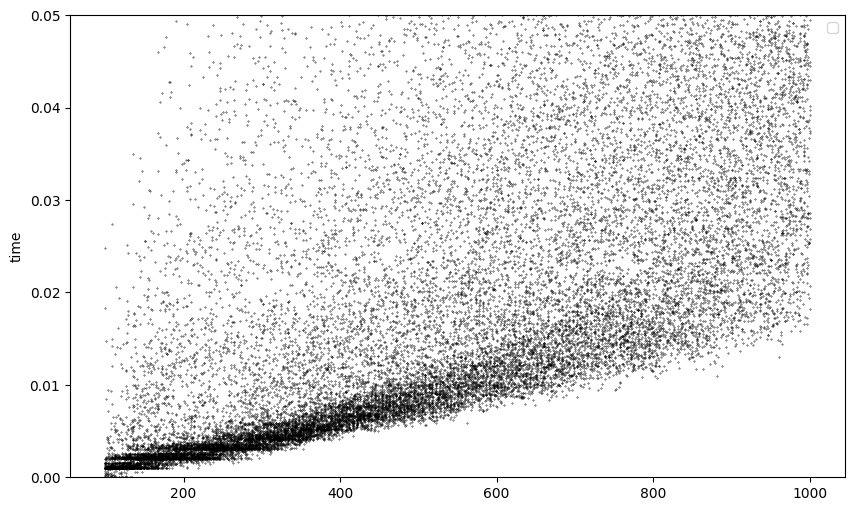

In [11]:
plotter(det,0.05)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


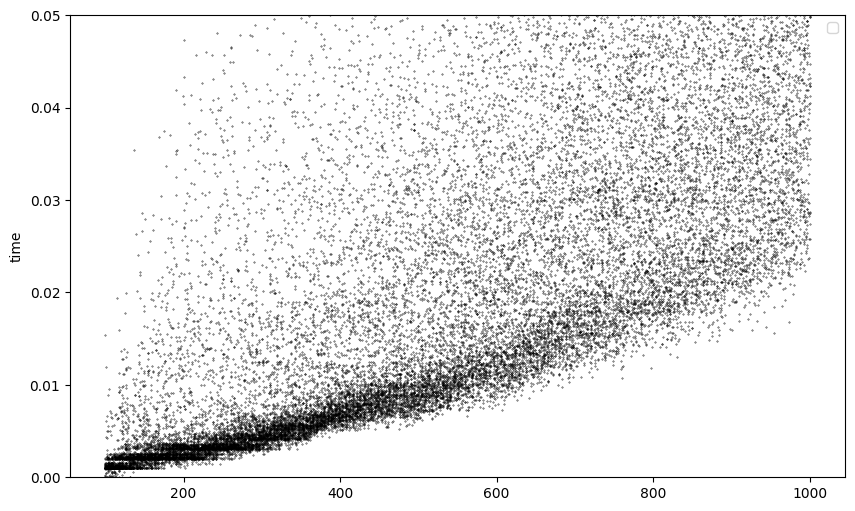

In [12]:
plotter(sol, 0.05)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


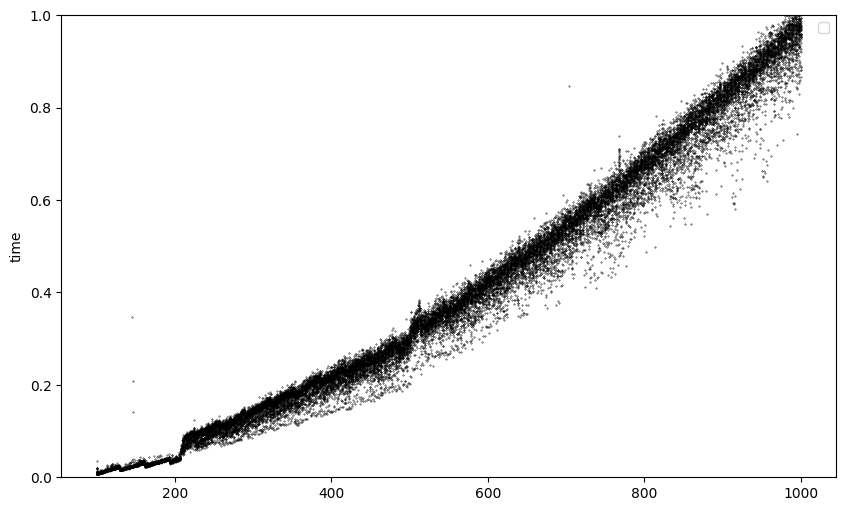

In [13]:
plotter(eig,1)

In [14]:
def plot_df(solver_time_df, title):
    index = solver_time_df.index.values+ 100.0
    mean = solver_time_df.mean(axis=1).values
    std = solver_time_df.std(axis=1).values
    index = np.array(index, dtype=float)
    mean = np.array(mean, dtype=float)
    std = np.array(std, dtype=float)

    deg = [3]

    coefficients = np.polyfit(index, mean, 2) 
    # p = np.poly1d(coefficients)
    # # 次数の数だけグラフを準備(2行5列のサブプロット)
    # fig, axes = plt.subplots(2, 5, figsize=(30,10))

    data = index
    target = mean
    data = data.reshape(-1,1)
    target = target.reshape(-1,1)
    score_list = []
    predict_list = []
    regr_list = []
    for d in deg:
        # pipelineを活用してデータの変換から学習・推定までの処理を一つの推定器として実行
        # 多項式変換した後、線形回帰モデルでパラメータを学習
        regr = Pipeline([
                        ('poly', PolynomialFeatures(degree=d)),
                        ('linear', LinearRegression())
                        ])

        # モデルの学習
        regr.fit(data, target)

        # 学習モデルによる予測結果の算出
        p_poly = regr.predict(data)
        predict_list.append(p_poly)

        regr_list.append(regr)

        poly_features = regr.named_steps['poly'].get_feature_names_out(input_features=['x'])
        coefs = regr.named_steps['linear'].coef_
        equation = "y = "
        coefs = coefs.flatten()
        score_list.append(regr.score(data, target))


    max_v = max(score_list)
    print(max_v)
    max_index = score_list.index(max_v)
    print(max_index+1)

    poly_features = regr_list[max_index].named_steps['poly'].get_feature_names_out(input_features=['x'])
    coefs = regr_list[max_index].named_steps['linear'].coef_
    equation = "y = "
    coefs = coefs.flatten()
    #score_list.append(regr.score(data, target))


    for i, coef in enumerate(coefs):
         if i == 0:
             equation += f"{coef:.5e}"
         else:
             equation += f" + {coef:.5e} * {poly_features[i]}"
    print(equation)
    
    plt.scatter(data, target,s=0.1,c="k")
    #plt.fill_between(index, mean + std, mean - std, alpha=0.4)
    plt.plot(data, predict_list[max_index], color = "r")


0.9130442131923542
1
y = 0.00000e+00 + 2.11115e-05 * x + 5.23591e-08 * x^2 + -1.78170e-11 * x^3


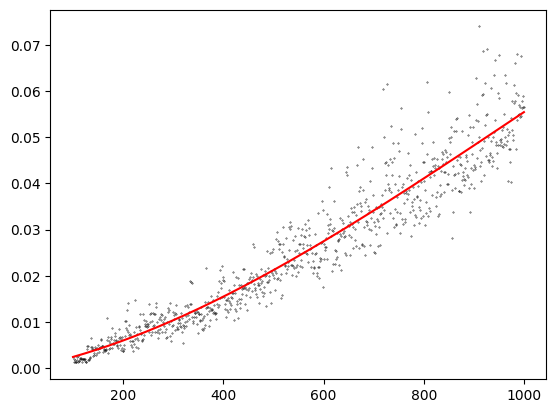

In [15]:

plot_df(det, "det")

0.9100643642134882
1
y = 0.00000e+00 + 4.95783e-06 * x + 8.39890e-08 * x^2 + -3.19790e-11 * x^3


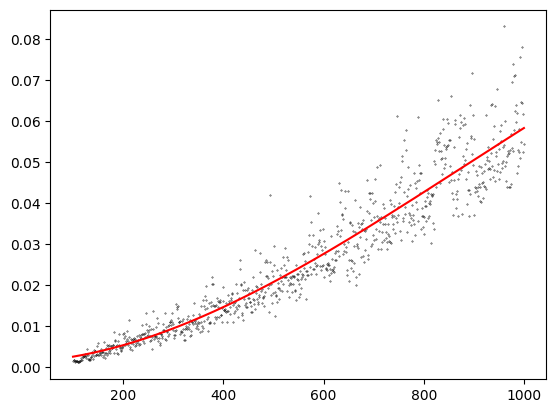

In [16]:
plot_df(sol, "sol")


0.9991068487373024
1
y = 0.00000e+00 + 3.82480e-04 * x + 5.94020e-07 * x^2 + 3.19751e-11 * x^3


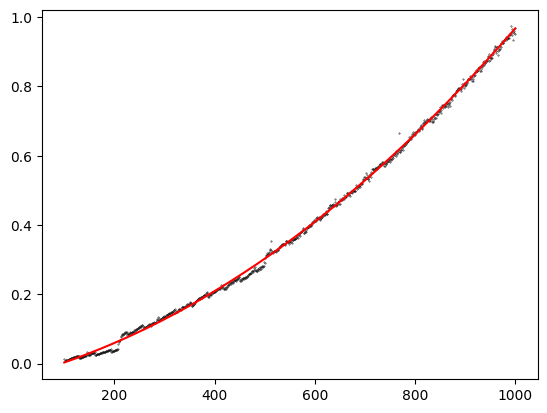

In [17]:
plot_df(eig, "eig")
